In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
who = pd.read_csv('Life Expectancy Data.csv', sep = ',')

In [7]:
who.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [8]:
who.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality", "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB", "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria", " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_10to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources", "Total expenditure":"Tot_Exp"},inplace=True)
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [9]:
who[who.filter(like='HepatitisB').isnull().any(1)] #there are 533 missing values 18%. Seem to be related to country
who.groupby(['Country'])['HepatitisB'].agg(['count', 'mean'])

count       mean
Country                                             
Afghanistan                            16  64.562500
Albania                                16  98.000000
Algeria                                12  78.000000
Angola                                  9  70.222222
Antigua and Barbuda                    15  98.266667
...                                   ...        ...
Venezuela (Bolivarian Republic of)     16  66.250000
Viet Nam                               13  87.538462
Yemen                                  16  55.687500
Zambia                                 11  69.818182
Zimbabwe                               16  70.562500

[193 rows x 2 columns]

In [10]:
who[who.filter(like='Polio').isnull().any(1)] #19 missing, same between poliio and diptheria

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
1742   Montenegro  2005  Developing             73.6            133.0   
1743   Montenegro  2004  Developing             73.5            134.0   
1744   Montenegro  2003  Developing             73.5            134.0   
1745   Montenegro  2002  Developing             73.4            136.0   
1746   Montenegro  2001  Developing             73.3            136.0   
1747   Montenegro  2000  Developing             73.0            144.0   
2414  South Sudan  2010  Developing             55.0            359.0   
2415  South Sudan  2009  Developing             54.3            369.0   
2416  South Sudan  2008  Developing             53.6            377.0   
2417  South Sudan  2007  Developing             53.1            381.0   
2418  South Sudan  2006  Developing             52.5            383.0   
2419  South Sudan  2005  Developing             51.9            383.0   
2420  South Sudan  2004  Developing             51.4            383.0   
2421  South Sudan  2003  Developing             58.0            383.0   
2422  South Sudan  2002  Developing             52.0            382.0   
2423  South Sudan  2001  Developing             49.6            381.0   
2424  South Sudan  2000  Developing             48.9             38.0   
2615  Timor-Leste  2001  Developing             59.4            269.0   
2616  Timor-Leste  2000  Developing             58.7            276.0   

      Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  Measles  ...  Polio  \
1742              0      NaN      527.307672         NaN        0  ...    NaN   
1743              0     0.01       57.121901         NaN        0  ...    NaN   
1744              0     0.01      495.078296         NaN        0  ...    NaN   
1745              0     0.01       36.480240         NaN        0  ...    NaN   
1746              0     0.01       33.669814         NaN        0  ...    NaN   
1747              0     0.01      274.547260         NaN        0  ...    NaN   
2414             27      NaN        0.000000         NaN        0  ...    NaN   
2415             27      NaN        0.000000         NaN        0  ...    NaN   
2416             27      NaN        0.000000         NaN        0  ...    NaN   
2417             27      NaN        0.000000         NaN        0  ...    NaN   
2418             28      NaN        0.000000         NaN        0  ...    NaN   
2419             28      NaN        0.000000         NaN        0  ...    NaN   
2420             29      NaN        0.000000         NaN        0  ...    NaN   
2421             29      NaN        0.000000         NaN        0  ...    NaN   
2422             30      NaN        0.000000         NaN        0  ...    NaN   
2423             30      NaN        0.000000         NaN        0  ...    NaN   
2424             31      NaN        0.000000         NaN        0  ...    NaN   
2615              3     0.50        6.556583         NaN        0  ...    NaN   
2616              3     0.50       49.069672         NaN        0  ...    NaN   

      Tot_Exp  Diphtheria  HIV/AIDS          GDP  Population  \
1742     8.46         NaN       0.1  3674.617924    614261.0   
1743     8.45         NaN       0.1   338.199535    613353.0   
1744     8.91         NaN       0.1  2789.173500    612267.0   
1745     8.33         NaN       0.1   216.243274     69828.0   
1746     8.23         NaN       0.1   199.583957     67389.0   
1747     7.32         NaN       0.1  1627.428930      6495.0   
2414      NaN         NaN       4.0  1562.239346    167192.0   
2415      NaN         NaN       4.2  1264.789980    967667.0   
2416      NaN         NaN       4.2  1678.711862   9263136.0   
2417      NaN         NaN       4.2          NaN     88568.0   
2418      NaN         NaN       4.1          NaN   8468152.0   
2419      NaN         NaN       3.9          NaN    818877.0   
2420      NaN         NaN       3.8          NaN   7787655.0   
2421      NaN         NaN       

In [11]:
who[who.filter(like='Population').isnull().any(1)] # not recorded by certain country
pd.set_option('display.max_rows', None)
who.groupby(['Country'])['Population'].agg(['count', 'mean'])

count          mean
Country                                                                
Afghanistan                                            16  9.972260e+06
Albania                                                16  6.969116e+05
Algeria                                                16  2.164983e+07
Angola                                                 16  1.014710e+07
Antigua and Barbuda                                     0           NaN
Argentina                                              16  2.012120e+07
Armenia                                                16  1.015165e+06
Australia                                              16  4.587010e+06
Austria                                                16  6.474880e+06
Azerbaijan                                             16  2.157370e+06
Bahamas                                                 0           NaN
Bahrain                                                 0           NaN
Bangladesh                                             16  4.298516e+07
Barbados                                                0           NaN
Belarus                                                16  6.371867e+06
Belgium                                                16  2.884043e+06
Belize                                                 16  1.703929e+05
Benin                                                  16  3.942979e+06
Bhutan                                                 16  4.925849e+05
Bolivia (Plurinational State of)                        0           NaN
Bosnia and Herzegovina                                 16  1.986993e+06
Botswana                                               16  1.063867e+06
Brazil                                                 16  8.812807e+07
Brunei Darussalam                                       0           NaN
Bulgaria                                               16  5.290924e+06
Burkina Faso                                           16  6.143695e+06
Burundi                                                16  3.915447e+06
Cabo Verde                                             16  2.926002e+05
Cambodia                                               16  7.145967e+06
Cameroon                                               16  9.967292e+06
Canada                                                 16  1.136405e+07
Central African Republic                               16  2.016546e+06
Chad                                                   16  4.114092e+06
Chile                                                  16  1.467176e+07
China                                                  16  3.218121e+05
Colombia                                               16  3.176743e+07
Comoros                                                16  5.322007e+05
Congo                                                   0           NaN
Cook Islands                                            0           NaN
Costa Rica                                             16  2.309299e+06
Croatia                                                16  1.159772e+06
Cuba                                                    0           NaN
Cyprus                                                 16  3.902744e+05
Czechia                                                 0           NaN
Côte d'Ivoire                                           0           NaN
Democratic People's Republic of Korea                   0           NaN
Democratic Republic of the Congo                        0           NaN
Denmark                                                16  4.260081e+06
Djibouti                                               16  6.341162e+05
Dominica                                                0           NaN
Dominican Republic                                     16  4.448643e+06
Ecuador                                                16  8.710592e+06
Egypt                                                   0           NaN
El Salvador                                            16  2.930826e+06
Equatorial Guinea   

In [12]:
who[who.filter(like='thinness_1to19_years').isnull().any(1)] #same as BMI and thinness 1-19 years and thinness 5-9 years


Empty DataFrame
Columns: [Country, Year, Status, Life_Expectancy, Adult_Mortality, Infant_Deaths, Alcohol, Percentage_Exp, HepatitisB, Measles, BMI, Under_Five_Deaths, Polio, Tot_Exp, Diphtheria, HIV/AIDS, GDP, Population, thinness_10to19_years, thinness_5to9_years, Income_Comp_Of_Resources, Schooling]
Index: []

[0 rows x 22 columns]

In [13]:
who[who.filter(like='Alcohol').isnull().any(1)] #showed that all the missing alcohol datapoints are from 2015, only 193 missing 7% of values
who.groupby(['Year'])['Alcohol'].agg(['count', 'mean'])

count      mean
Year                 
2000    182  4.570714
2001    182  4.555659
2002    182  4.660934
2003    182  4.690495
2004    182  4.753681
2005    181  4.846409
2006    182  4.917692
2007    182  5.014066
2008    182  5.007088
2009    182  4.889231
2010    182  4.943626
2011    182  4.871648
2012    182  4.138187
2013    191  3.924450
2014    182  3.271319
2015      6  5.288333

In [14]:
who[who.filter(like='Income_Comp_Of_Resources').isnull().any(1)] # same missing as Schooling

Country  Year      Status  \
432                                       Côte d'Ivoire  2015  Developing   
433                                       Côte d'Ivoire  2014  Developing   
434                                       Côte d'Ivoire  2013  Developing   
435                                       Côte d'Ivoire  2012  Developing   
436                                       Côte d'Ivoire  2011  Developing   
437                                       Côte d'Ivoire  2010  Developing   
438                                       Côte d'Ivoire  2009  Developing   
439                                       Côte d'Ivoire  2008  Developing   
440                                       Côte d'Ivoire  2007  Developing   
441                                       Côte d'Ivoire  2006  Developing   
442                                       Côte d'Ivoire  2005  Developing   
443                                       Côte d'Ivoire  2004  Developing   
444                                       Côte d'Ivoire  2003  Developing   
445                                       Côte d'Ivoire  2002  Developing   
446                                       Côte d'Ivoire  2001  Developing   
447                                       Côte d'Ivoire  2000  Developing   
624                                        Cook Islands  2013  Developing   
689                                             Czechia  2015   Developed   
690                                             Czechia  2014   Developed   
691                                             Czechia  2013   Developed   
692                                             Czechia  2012   Developed   
693                                             Czechia  2011   Developed   
694                                             Czechia  2010   Developed   
695                                             Czechia  2009   Developed   
696                                             Czechia  2008   Developed   
697                                             Czechia  2007   Developed   
698                                             Czechia  2006   Developed   
699                                             Czechia  2005   Developed   
700                                             Czechia  2004   Developed   
701                                             Czechia  2003   Developed   
702                                             Czechia  2002   Developed   
703                                             Czechia  2001   Developed   
704                                             Czechia  2000   Developed   
705               Democratic People's Republic of Korea  2015  Developing   
706               Democratic People's Republic of Korea  2014  Developing   
707               Democratic People's Republic of Korea  2013  Developing   
708               Democratic People's Republic of Korea  2012  Developing   
709               Democratic People's Republic of Korea  2011  Developing   
710               Democratic People's Republic of Korea  2010  Developing   
711               Democratic People's Republic of Korea  2009  Developing   
712               Democratic People's Republic of Korea  2008  Developing   
713               Democratic People's Republic of Korea  2007  Developing   
714               Democratic People's Republic of Korea  2006  Developing   
715               Democratic People's Republic of Korea  2005  Developing   
716               Democratic People's Republic of Korea  2004  Developing   
717               Democratic People's Republic of Korea  2003  Developing   
718               Democratic People's Republic of Korea  2002  Developing   
719               Democratic People's Republic of Korea  2001  Developing   
720               Democratic People's Republic of Korea  2000  Developing   
721                    Democratic Republic of the Congo  2015  Developing   
722                    Democratic Republic of the Congo  2014  Developing   
723                    Democratic Republic o

In [15]:
who[who.filter(like='GDP').isnull().any(1)] # GDP is missing from entire countries
who.groupby(['Country'])['GDP'].agg(['count', 'mean'])

count          mean
Country                                                                
Afghanistan                                            16    340.015425
Albania                                                16   2119.726679
Algeria                                                16   2847.853392
Angola                                                 16   1975.143045
Antigua and Barbuda                                    16   9759.305728
Argentina                                              16   6998.575103
Armenia                                                16   1999.986318
Australia                                              16  34637.565047
Austria                                                16  33827.476309
Azerbaijan                                             16   3302.947807
Bahamas                                                 0           NaN
Bahrain                                                16  11191.247421
Bangladesh                                             16    443.561481
Barbados                                               16  12017.098529
Belarus                                                16   3811.525348
Belgium                                                16  16915.306000
Belize                                                 16   3933.012175
Benin                                                  16    561.167968
Bhutan                                                 16   1353.986946
Bolivia (Plurinational State of)                        0           NaN
Bosnia and Herzegovina                                 16   2245.026024
Botswana                                               16   4498.285431
Brazil                                                 16   6143.161794
Brunei Darussalam                                      16  19744.808102
Bulgaria                                               16   4938.981821
Burkina Faso                                           16    410.372034
Burundi                                                16    137.815321
Cabo Verde                                             16   2023.541039
Cambodia                                               16    466.196878
Cameroon                                               16    781.016004
Canada                                                 16  29382.907523
Central African Republic                               16    363.055905
Chad                                                   16    484.791694
Chile                                                  16   6202.344364
China                                                  16   2345.303158
Colombia                                               16   3321.660748
Comoros                                                16    630.384334
Congo                                                   0           NaN
Cook Islands                                            0           NaN
Costa Rica                                             16   3957.227286
Croatia                                                16   9056.784719
Cuba                                                   16   3180.434884
Cyprus                                                 16  13898.885501
Czechia                                                 0           NaN
Côte d'Ivoire                                           0           NaN
Democratic People's Republic of Korea                   0           NaN
Democratic Republic of the Congo                        0           NaN
Denmark                                                16  33067.407916
Djibouti                                               16    897.999871
Dominica                                                1    722.756650
Dominican Republic                                     16   3509.499186
Ecuador                                                16   2005.352468
Egypt                                                   0           NaN
El Salvador                                            16   2517.834630
Equatorial Guinea   

In [16]:
who[who.filter(like='Percentage_Exp').isnull().any(1)] #looks to be a 2015 problem
who.groupby(['Year'])['Percentage_Exp'].agg(['count', 'mean'])

count         mean
Year                    
2000    183   473.850781
2001    183   516.625910
2002    183   476.794487
2003    183   494.706547
2004    183   772.336156
2005    183   823.318110
2006    183   828.776319
2007    183   954.458468
2008    183  1095.802669
2009    183   719.827424
2010    183   768.221388
2011    183  1029.534746
2012    183  1011.471726
2013    193   836.623984
2014    183  1001.912550
2015    183     2.383906

In [17]:
who[who.filter(like='Adult_Mortality').isnull().any(1)]#for the mortality factor group of data only adult mortality was missing any data, which corresponds with the missing Life expectancy data.
#therefore, I'm just deleting those NaN data from the dataset
who.dropna(subset = ['Adult_Mortality'], inplace = True)
who.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2928 non-null   object 
 1   Year                      2928 non-null   int64  
 2   Status                    2928 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2928 non-null   int64  
 6   Alcohol                   2735 non-null   float64
 7   Percentage_Exp            2928 non-null   float64
 8   HepatitisB                2375 non-null   float64
 9   Measles                   2928 non-null   int64  
 10  BMI                       2896 non-null   float64
 11  Under_Five_Deaths         2928 non-null   int64  
 12  Polio                     2909 non-null   float64
 13  Tot_Exp                   2702 non-null   float64
 14  Diphther

In [18]:
# I chose to remove sudan and south sudan because there are multiple columns that are missing the entire dataset (BMI, thinness 1-19 and 5-19)
#poliio and diptheria data is completely 
who_drop = who.loc[who['Country'] == 'South Sudan'].index
who = who.drop(who_drop)

In [19]:
who_drop2 = who.loc[who['Country'] == 'Sudan'].index
who = who.drop(who_drop2)

In [20]:
who

Country  Year      Status  \
0                                           Afghanistan  2015  Developing   
1                                           Afghanistan  2014  Developing   
2                                           Afghanistan  2013  Developing   
3                                           Afghanistan  2012  Developing   
4                                           Afghanistan  2011  Developing   
5                                           Afghanistan  2010  Developing   
6                                           Afghanistan  2009  Developing   
7                                           Afghanistan  2008  Developing   
8                                           Afghanistan  2007  Developing   
9                                           Afghanistan  2006  Developing   
10                                          Afghanistan  2005  Developing   
11                                          Afghanistan  2004  Developing   
12                                          Afghanistan  2003  Developing   
13                                          Afghanistan  2002  Developing   
14                                          Afghanistan  2001  Developing   
15                                          Afghanistan  2000  Developing   
16                                              Albania  2015  Developing   
17                                              Albania  2014  Developing   
18                                              Albania  2013  Developing   
19                                              Albania  2012  Developing   
20                                              Albania  2011  Developing   
21                                              Albania  2010  Developing   
22                                              Albania  2009  Developing   
23                                              Albania  2008  Developing   
24                                              Albania  2007  Developing   
25                                              Albania  2006  Developing   
26                                              Albania  2005  Developing   
27                                              Albania  2004  Developing   
28                                              Albania  2003  Developing   
29                                              Albania  2002  Developing   
30                                              Albania  2001  Developing   
31                                              Albania  2000  Developing   
32                                              Algeria  2015  Developing   
33                                              Algeria  2014  Developing   
34                                              Algeria  2013  Developing   
35                                              Algeria  2012  Developing   
36                                              Algeria  2011  Developing   
37                                              Algeria  2010  Developing   
38                                              Algeria  2009  Developing   
39                                              Algeria  2008  Developing   
40                                              Algeria  2007  Developing   
41                                              Algeria  2006  Developing   
42                                              Algeria  2005  Developing   
43                                              Algeria  2004  Developing   
44                                              Algeria  2003  Developing   
45                                              Algeria  2002  Developing   
46                                              Algeria  2001  Developing   
47                                              Algeria  2000  Developing   
48                                               Angola  2015  Developing   
49                                               Angola  2014  Developing   
50                                               Angola  2013  Developing   
51                                          

In [21]:
who.loc[who['Measles'] > 1000]
#in the description of Measles it is per 1000 of population but there are 513 that have values over 1000. 
#I assume it is just the number of measles cases in that year (and according to what I could find in CDC data for the US https://www.cdc.gov/measles/cases-outbreaks.html), 
#either we rename it or we remove the column.
# If we drop the column:
who.drop(columns = 'Measles', inplace = True)
who.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2896 non-null   object 
 1   Year                      2896 non-null   int64  
 2   Status                    2896 non-null   object 
 3   Life_Expectancy           2896 non-null   float64
 4   Adult_Mortality           2896 non-null   float64
 5   Infant_Deaths             2896 non-null   int64  
 6   Alcohol                   2720 non-null   float64
 7   Percentage_Exp            2896 non-null   float64
 8   HepatitisB                2363 non-null   float64
 9   BMI                       2896 non-null   float64
 10  Under_Five_Deaths         2896 non-null   int64  
 11  Polio                     2888 non-null   float64
 12  Tot_Exp                   2684 non-null   float64
 13  Diphtheria                2888 non-null   float64
 14  HIV/AIDS

In [22]:
# Average data trend of Life Expectancy over 15 years

import plotly
import plotly.graph_objects as go

life_year = who.groupby(by = ['Year', 'Status']).mean().reset_index()
Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]

fig = go.Figure()
for template in ["plotly_white"]:
    fig.add_trace(go.Scatter(x=Developing['Year'], y=Developing['Life_Expectancy'],
                    mode='lines',
                    name='Developing'))
    fig.add_trace(go.Scatter(x=Developed['Year'], y=Developed['Life_Expectancy'],
                    mode='lines',
                    name='Developed'))
    fig.update_layout(
    height=500,
    xaxis_title="Years",
    yaxis_title='Life Expectancy',
    title_text='Average Life Expectancy of Developing and Developed countries over the years',
    template=template)
fig.show()

In [23]:
## Section 3.3. Social Factor Analysis - defining social factors columns

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


who_social_cols = who[['Life_Expectancy', 'BMI', 'Alcohol', 'thinness_10to19_years','thinness_5to9_years','Schooling','Population']]

In [24]:
## Section 3.3. Social Factor Analysis - detecting missing values

who_social_cols.isnull().sum().sort_values(ascending=False)

Population               644
Alcohol                  176
Schooling                160
Life_Expectancy            0
BMI                        0
thinness_10to19_years      0
thinness_5to9_years        0
dtype: int64

In [25]:
# Section3.3. social factors analysis - missing values

# missing population values filled with random values based on mean

for dataset in who:
    mean = who["Population"].mean()
    std = who["Population"].std()
    is_null = who["Population"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_population = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in with random values generated
    pop_slice = who["Population"].copy()
    pop_slice[np.isnan(pop_slice)] = rand_population
    who["Population"] = pop_slice
    who["Population"] =who["Population"].astype(int)
print(who["Population"].isnull().sum())


# missing alcohol values filled with random values based on mean

for dataset in who:
    mean = who["Alcohol"].mean()
    std = who["Alcohol"].std()
    is_null = who["Alcohol"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_alc = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in with random values generated
    alc_slice = who["Alcohol"].copy()
    alc_slice[np.isnan(alc_slice)] = rand_alc
    who["Alcohol"] = alc_slice
    who["Alcohol"] =who["Alcohol"].astype(int)
print(who["Alcohol"].isnull().sum())



# missing schooling values filled with random values based on mean

for dataset in who:
    mean = who["Schooling"].mean()
    std = who["Schooling"].std()
    is_null = who["Schooling"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_sch = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in with random values generated
    sch_slice = who["Schooling"].copy()
    sch_slice[np.isnan(sch_slice)] = rand_sch
    who["Schooling"] = sch_slice
    who["Schooling"] =who["Schooling"].astype(int)
print(who["Schooling"].isnull().sum())


# missing thinness 5-9 years values filled with random values based on mean

for dataset in who:
    mean = who["thinness_5to9_years"].mean()
    std = who["thinness_5to9_years"].std()
    is_null = who["thinness_5to9_years"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_thin59 = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in with random values generated
    thin59_slice = who["thinness_5to9_years"].copy()
    thin59_slice[np.isnan(thin59_slice)] = rand_thin59
    who["thinness_5to9_years"] = thin59_slice
    who["thinness_5to9_years"] =who["thinness_5to9_years"].astype(int)
print(who["thinness_5to9_years"].isnull().sum())



# missing thinness 10-19 years values filled with random values based on mean

for dataset in who:
    mean = who["thinness_10to19_years"].mean()
    std = who["thinness_10to19_years"].std()
    is_null = who["thinness_10to19_years"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_thin1019 = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values with random values generated
    thin1019_slice = who["thinness_10to19_years"].copy()
    thin1019_slice[np.isnan(thin1019_slice)] = rand_thin1019
    who["thinness_10to19_years"] = thin1019_slice
    who["thinness_10to19_years"] =who["thinness_10to19_years"].astype(int)
print(who["thinness_10to19_years"].isnull().sum())



# missing BMI values filled with random values based on mean

for dataset in who:
    mean = who["BMI"].mean()
    std = who["BMI"].std()
    is_null = who["BMI"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_BMI = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values with random values generated
    BMI_slice = who["BMI"].copy()
    BMI_slice[np.isnan(BMI_slice)] = rand_BMI
    who["BMI"] = BMI_slice
    who["BMI"] =who["BMI"].astype(int)
print(who["BMI"].isnull().sum())


0
0
0
0
0
0


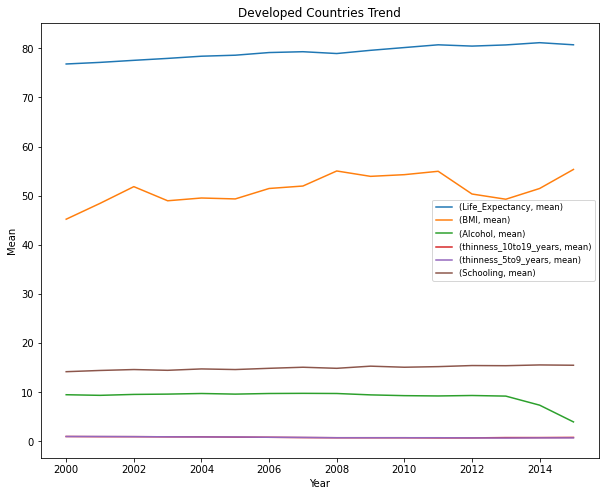

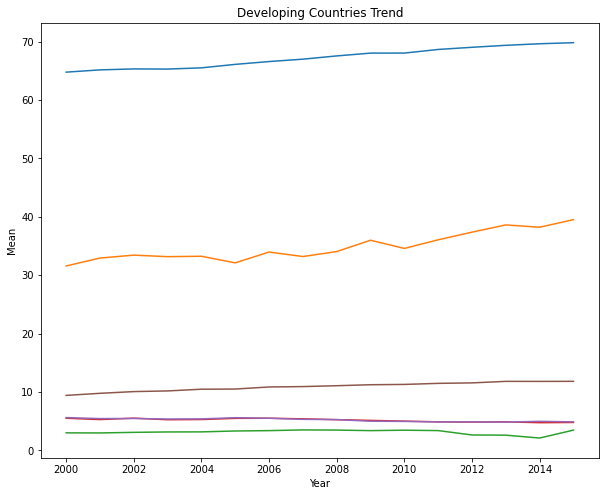

In [26]:
#Section 3.3 social factors analysis

#data trend over the years from 2000 to 2015

who_status1=who.loc[who['Status'] == 'Developed']
who_status1.groupby(['Year'])[['Life_Expectancy', 'BMI', 'Alcohol', 'thinness_10to19_years','thinness_5to9_years','Schooling']].aggregate(['mean']).plot.line(legend=' ',figsize=(10,8))
plt.ylabel('Mean')
plt.title('Developed Countries Trend')
plt.legend(loc='center right', fontsize='small')
plt.savefig('trend_socialFactors_developed.png', dpi=300, bbox_inches='tight')


who_status2=who.loc[who['Status'] == 'Developing']
who_status2.groupby(['Year'])[['Life_Expectancy', 'BMI', 'Alcohol', 'thinness_10to19_years','thinness_5to9_years','Schooling']].aggregate(['mean']).plot.line(legend=None, figsize=(10,8))
plt.ylabel('Mean')
plt.title('Developing Countries Trend')
#plt.legend( loc='best', fontsize='x-small')

plt.savefig('trend_socialFactors_developing.png', dpi=300, bbox_inches='tight')


In [27]:
## Section 3.3. Social Factor Analysis

# Correlation of social factors and life expectancy 

who_social_cols.corr()['Life_Expectancy'].sort_values(ascending=False)

Life_Expectancy          1.000000
Schooling                0.749688
BMI                      0.567694
Alcohol                  0.403050
Population              -0.022951
thinness_5to9_years     -0.471584
thinness_10to19_years   -0.477183
Name: Life_Expectancy, dtype: float64

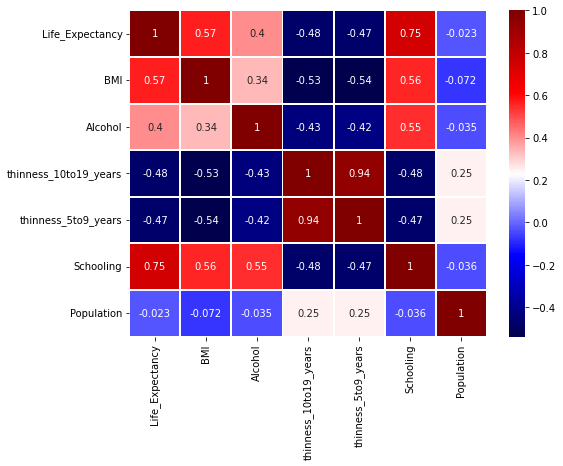

In [28]:
# Section 3.3. Social Factor Analysis

# Heatmap of social factors and life expectancy 

plt.figure(figsize=(8,6))
sns.heatmap(who_social_cols.corr(), annot =True, cmap='seismic', linewidths = 1)
plt.savefig('heatmap_socialFactors.png', dpi=300, bbox_inches='tight')

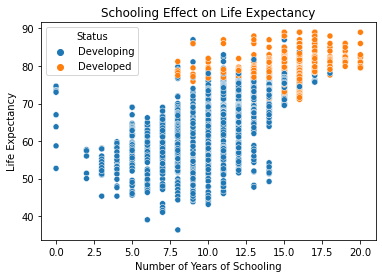

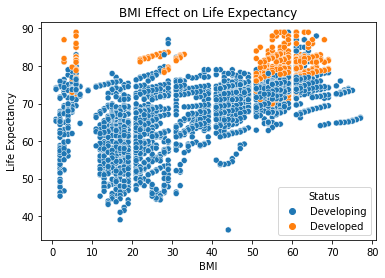

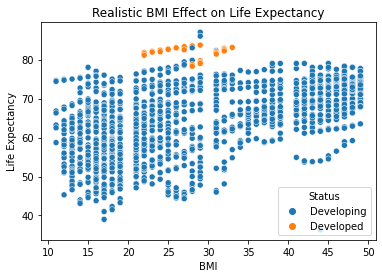

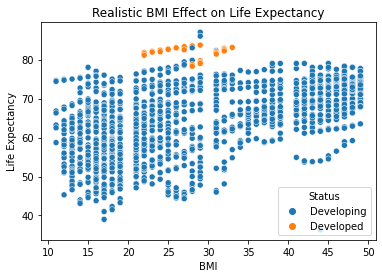

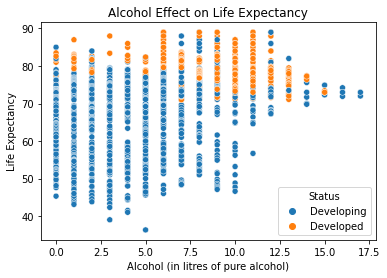

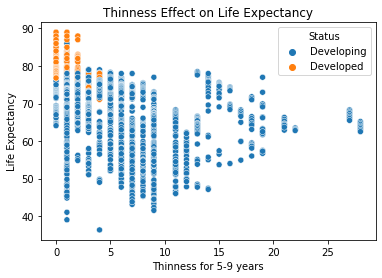

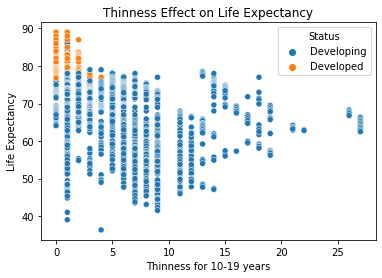

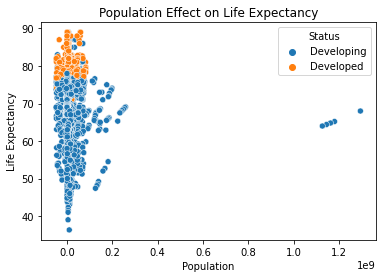

<Figure size 432x288 with 0 Axes>

In [29]:
# Section 3.3. Social Factor Analysis

#Visualization of each factor

sns.scatterplot(x='Schooling', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Number of Years of Schooling");
plt.title("Schooling Effect on Life Expectancy");
plt.ylabel("Life Expectancy");
plt.show()
plt.savefig('schooling.png', dpi=300, bbox_inches='tight')

sns.scatterplot(x='BMI', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("BMI");
plt.title("BMI Effect on Life Expectancy");
plt.ylabel("Life Expectancy");
plt.show()
plt.savefig('bmi.png', dpi=300, bbox_inches='tight')


# Defining a more realistic BMI limits
who.BMI = who.apply(lambda x: np.nan if (x.BMI < 10 or x.BMI > 50) else x.BMI, axis=1)


sns.scatterplot(x='BMI', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("BMI");
plt.title("Realistic BMI Effect on Life Expectancy");
plt.ylabel("Life Expectancy");
plt.show()
plt.savefig('real_bmi.png', dpi=300, bbox_inches='tight')


who.BMI = who.apply(lambda x: np.nan if (x.BMI < 10 or x.BMI > 50) else x.BMI, axis=1)

sns.scatterplot(x='BMI', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("BMI");
plt.title("Realistic BMI Effect on Life Expectancy");
plt.ylabel("Life Expectancy");
plt.show()
plt.savefig('real_bmi.png', dpi=300, bbox_inches='tight')


sns.scatterplot(x='Alcohol', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Alcohol (in litres of pure alcohol)");
plt.title("Alcohol Effect on Life Expectancy");
plt.ylabel("Life Expectancy");
plt.show()
plt.savefig('alcohol.png', dpi=300, bbox_inches='tight')


sns.scatterplot(x='thinness_5to9_years', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Thinness for 5-9 years");
plt.title("Thinness Effect on Life Expectancy");
plt.ylabel("Life Expectancy");
plt.show()
plt.savefig('thin5to9.png', dpi=300, bbox_inches='tight')


sns.scatterplot(x='thinness_10to19_years', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Thinness for 10-19 years");
plt.title("Thinness Effect on Life Expectancy");
plt.ylabel("Life Expectancy");
plt.show()
plt.savefig('thin10to19.png', dpi=300, bbox_inches='tight')


sns.scatterplot(x='Population', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Population");
plt.title("Population Effect on Life Expectancy");
plt.ylabel("Life Expectancy");
plt.show()
plt.savefig('population.png', dpi=300, bbox_inches='tight')


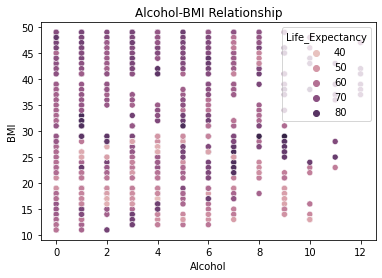

<Figure size 432x288 with 0 Axes>

In [30]:
# Section 3.3. Social Factor Analysis

sns.scatterplot(x='Alcohol', y='BMI', hue='Life_Expectancy', data=who)
plt.xlabel("Alcohol");
plt.title("Alcohol-BMI Relationship");
plt.ylabel("BMI"); 
plt.show()
plt.savefig('alcohol_bmi_life.png', dpi=300, bbox_inches='tight')


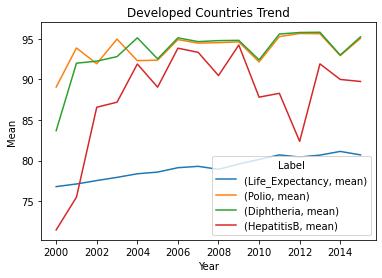

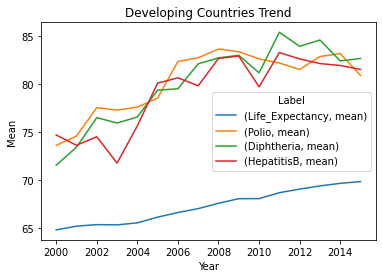

In [31]:
#Section 3.4 immunization analysis-data trend over the years from 2000 to 2015

who_temp1=who.loc[who['Status'] == 'Developed']
who_temp1.groupby(['Year'])[['Life_Expectancy','Polio','Diphtheria', 'HepatitisB']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Developed Countries Trend')
plt.legend(title = "Label")



who_temp2=who.loc[who['Status'] == 'Developing']
who_temp2.groupby(['Year'])[['Life_Expectancy','Polio','Diphtheria', 'HepatitisB']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Developing Countries Trend')
plt.legend(title = "Label")


In [32]:
#Section 3.4 immunization analysis
who_temp2=who.loc[who['Status'] == 'Developing']
who_temp2.groupby(['Year'])[['Life_Expectancy','Polio','Diphtheria','HepatitisB']].aggregate(['mean'])

Life_Expectancy      Polio Diphtheria HepatitisB
                mean       mean       mean       mean
Year                                                 
2000       64.765772  73.591837  71.517007  74.676471
2001       65.154362  74.564626  73.394558  73.597403
2002       65.318121  77.527027  76.486486  74.489362
2003       65.292617  77.270270  75.918919  71.738739
2004       65.502685  77.581081  76.554054  75.627119
2005       66.097315  78.527027  79.351351  80.087302
2006       66.580537  82.348993  79.496644  80.638462
2007       66.989933  82.731544  82.100671  79.810219
2008       67.544295  83.644295  82.718121  82.666667
2009       68.024832  83.362416  82.993289  82.909722
2010       68.031544  82.617450  81.161074  79.696552
2011       68.651007  82.181208  85.395973  83.275862
2012       69.022819  81.503356  83.926174  82.613793
2013       69.359060  82.865772  84.583893  82.129252
2014       69.626846  83.174497  82.402685  81.925676
2015       69.810738  80.879195  82.657718  81.513514

In [33]:
#Section 3.4 immunization analysis
who_temp1=who.loc[who['Status'] == 'Developed']
who_temp1.groupby(['Year'])[['Life_Expectancy','Polio','Diphtheria','HepatitisB']].aggregate(['mean'])


Life_Expectancy     Polio Diphtheria HepatitisB
                mean      mean       mean       mean
Year                                                
2000       76.803125  89.06250   83.68750  71.470588
2001       77.128125  93.87500   92.00000  75.500000
2002       77.546875  91.93750   92.25000  86.578947
2003       77.940625  94.96875   92.81250  87.200000
2004       78.384375  92.31250   95.12500  91.900000
2005       78.590625  92.37500   92.53125  89.050000
2006       79.131250  94.90625   95.12500  93.850000
2007       79.300000  94.46875   94.65625  93.333333
2008       78.931250  94.53125   94.78125  90.476190
2009       79.584375  94.62500   94.81250  94.238095
2010       80.146875  92.15625   92.40625  87.818182
2011       80.706250  95.28125   95.59375  88.291667
2012       80.443750  95.65625   95.78125  82.375000
2013       80.681250  95.62500   95.81250  91.916667
2014       81.137500  92.93750   93.00000  90.000000
2015       80.709375  95.06250   95.25000  89.750000

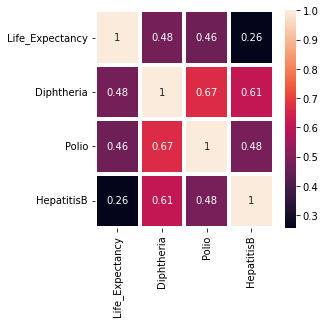

In [34]:
#Section 3.4 immunization analysis-heat map plot
who_temp = who[['Life_Expectancy', 'Country', 'Status','Diphtheria', 'Polio','HepatitisB']]
plt.figure(figsize=(4,4))
sns.heatmap(who_temp.corr(), annot =True, linewidths = 3)

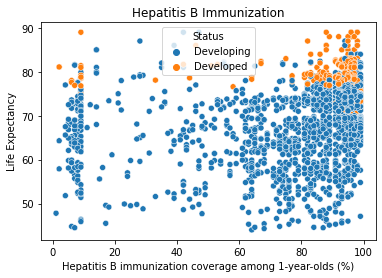

In [35]:
#Section 3.4 immunization analysis-scatter plot

sns.scatterplot(x='HepatitisB', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Hepatitis B immunization coverage among 1-year-olds (%)");
plt.title("Hepatitis B Immunization");
plt.ylabel("Life Expectancy");

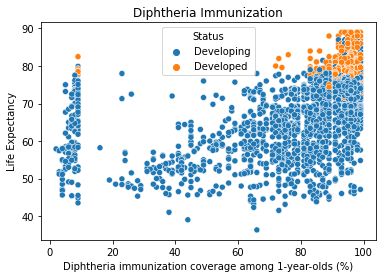

In [36]:
#Section 3.4 immunization analysis-scatter plot
sns.scatterplot(x='Diphtheria', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Diphtheria immunization coverage among 1-year-olds (%)");
plt.title("Diphtheria Immunization");
plt.ylabel("Life Expectancy");

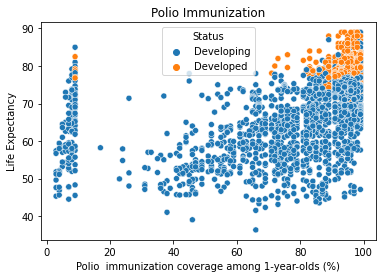

In [37]:
#Section 3.4 immunization analysis-scatter plot
sns.scatterplot(x='Polio', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Polio  immunization coverage among 1-year-olds (%)");
plt.title("Polio Immunization");

plt.ylabel("Life Expectancy");

In [38]:
#Section 3.2 Economic Factors
    #Check 4 columns of Economic Factors: GDP, income composition, total expenditure, percentage expenditure.
    #And 4 potential use columns: 'Country','Year','Status','Life_Expectancy'
    #Get overall info for who_eco_cols
    
    #For missing data:
    #GDP is missing from entire countries, so cannot fill by country and year.
    #Tot_Exp has a problem on 2015, so need to drop 2015 data
    #Overall, drop na and 2015 data.
who_eco_cols = who[['Country','Year','Status','Life_Expectancy','GDP', 'Income_Comp_Of_Resources', 'Tot_Exp', 'Percentage_Exp']]
who_eco_cols.drop(who_eco_cols[who_eco_cols['Year'] > 2014].index, inplace = True)
who_eco=who_eco_cols.dropna(subset=['GDP','Tot_Exp','Percentage_Exp'])

print(who_eco.info())
print(who_eco.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 1 to 2937
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2307 non-null   object 
 1   Year                      2307 non-null   int64  
 2   Status                    2307 non-null   object 
 3   Life_Expectancy           2307 non-null   float64
 4   GDP                       2307 non-null   float64
 5   Income_Comp_Of_Resources  2307 non-null   float64
 6   Tot_Exp                   2307 non-null   float64
 7   Percentage_Exp            2307 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 162.2+ KB
None
Country                     0
Year                        0
Status                      0
Life_Expectancy             0
GDP                         0
Income_Comp_Of_Resources    0
Tot_Exp                     0
Percentage_Exp              0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



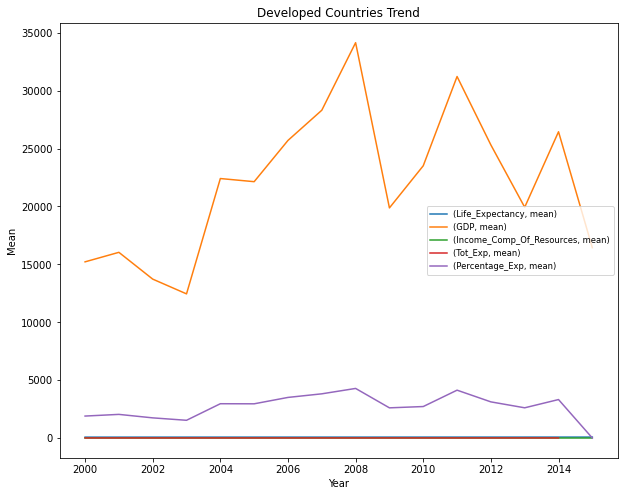

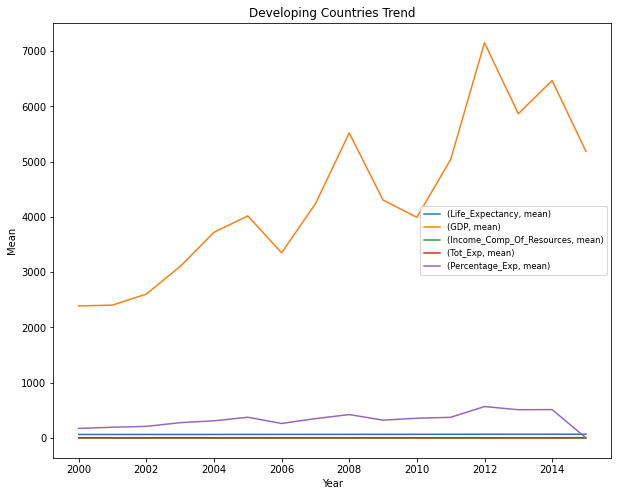

In [39]:
#Section 3.2 Economic Factors
    #data trend over the years from 2000 to 2015

who_tem1=who.loc[who['Status'] == 'Developed']
who_tem1.groupby(['Year'])[['Life_Expectancy','GDP', 'Income_Comp_Of_Resources', 'Tot_Exp', 'Percentage_Exp']].aggregate(['mean']).plot.line(legend=' ',figsize=(10,8))
plt.ylabel('Mean')
plt.title('Developed Countries Trend')
plt.legend(loc='center right', fontsize='small')
plt.savefig('trend_socialFactors_developed.png', dpi=300, bbox_inches='tight')


who_tem2=who.loc[who['Status'] == 'Developing']
who_tem2.groupby(['Year'])[['Life_Expectancy','GDP', 'Income_Comp_Of_Resources', 'Tot_Exp', 'Percentage_Exp']].aggregate(['mean']).plot.line(legend=None, figsize=(10,8))
plt.ylabel('Mean')
plt.title('Developing Countries Trend')
plt.legend(loc='center right', fontsize='small')
plt.savefig('trend_socialFactors_developing.png', dpi=300, bbox_inches='tight')

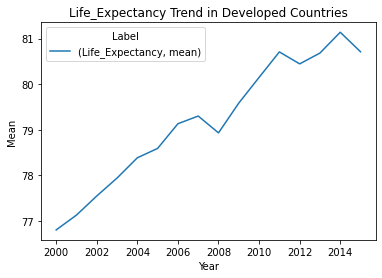

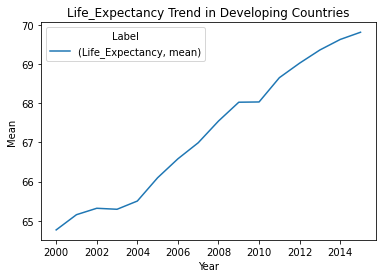

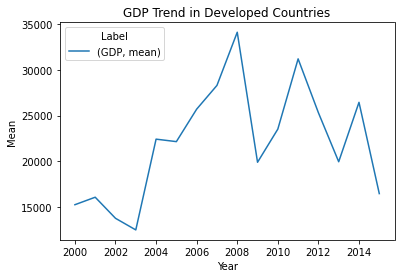

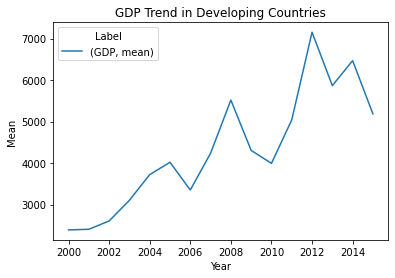

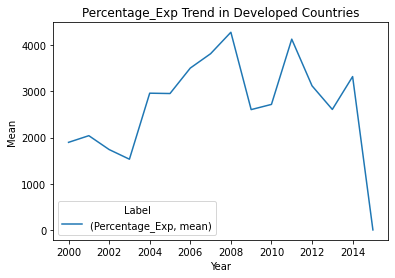

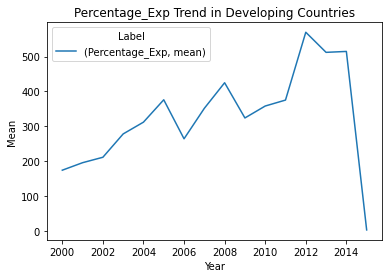

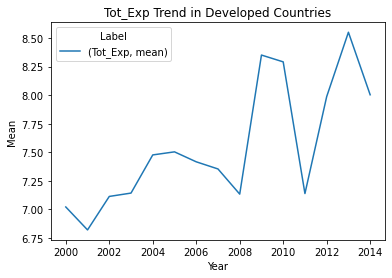

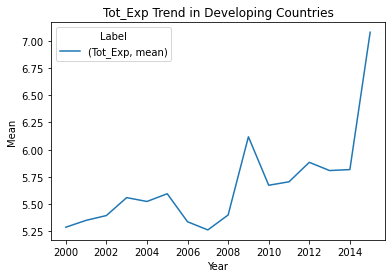

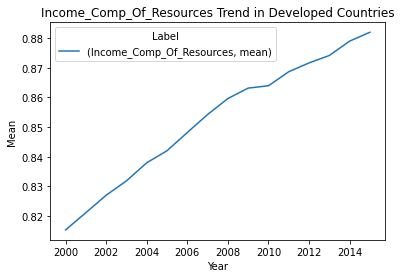

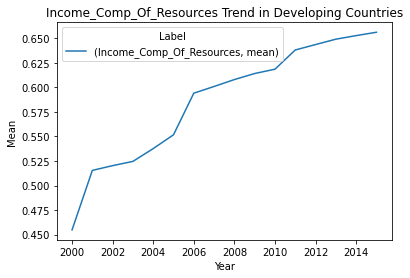

In [40]:
#Section 3.2 Economic Factors
#'Life_Expectancy' by Status
who_tem1=who.loc[who['Status'] == 'Developed']
who_tem1.groupby(['Year'])[['Life_Expectancy']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Life_Expectancy Trend in Developed Countries')
plt.legend(title = "Label")

who_tem2=who.loc[who['Status'] == 'Developing']
who_tem2.groupby(['Year'])[['Life_Expectancy']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Life_Expectancy Trend in Developing Countries')
plt.legend(title = "Label")

#'GDP' by Status
who_tem3=who.loc[who['Status'] == 'Developed']
who_tem3.groupby(['Year'])[['GDP']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('GDP Trend in Developed Countries')
plt.legend(title = "Label")

who_tem4=who.loc[who['Status'] == 'Developing']
who_tem4.groupby(['Year'])[['GDP']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('GDP Trend in Developing Countries')
plt.legend(title = "Label")

#'Percentage_Exp' by Status
who_tem5=who.loc[who['Status'] == 'Developed']
who_tem5.groupby(['Year'])[['Percentage_Exp']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Percentage_Exp Trend in Developed Countries')
plt.legend(title = "Label")

who_tem6=who.loc[who['Status'] == 'Developing']
who_tem6.groupby(['Year'])[['Percentage_Exp']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Percentage_Exp Trend in Developing Countries')
plt.legend(title = "Label")

#'Tot_Exp' by Status
who_tem7=who.loc[who['Status'] == 'Developed']
who_tem7.groupby(['Year'])[['Tot_Exp']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Tot_Exp Trend in Developed Countries')
plt.legend(title = "Label")

who_tem8=who.loc[who['Status'] == 'Developing']
who_tem8.groupby(['Year'])[['Tot_Exp']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Tot_Exp Trend in Developing Countries')
plt.legend(title = "Label")

#'Income_Comp_Of_Resources' by Status
who_tem9=who.loc[who['Status'] == 'Developed']
who_tem9.groupby(['Year'])[['Income_Comp_Of_Resources']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Income_Comp_Of_Resources Trend in Developed Countries')
plt.legend(title = "Label")

who_tem10=who.loc[who['Status'] == 'Developing']
who_tem10.groupby(['Year'])[['Income_Comp_Of_Resources']].aggregate(['mean']).plot.line(legend=' ')
plt.ylabel('Mean')
plt.title('Income_Comp_Of_Resources Trend in Developing Countries')
plt.legend(title = "Label")



In [41]:
#Section 3.2 Economic Factors
who_tem1=who.loc[who['Status'] == 'Developed']
who_tem1.groupby(['Year'])[['Life_Expectancy','GDP', 'Income_Comp_Of_Resources', 'Tot_Exp', 'Percentage_Exp']].aggregate(['count','mean'])

Life_Expectancy              GDP               Income_Comp_Of_Resources  \
               count       mean count          mean                    count   
Year                                                                           
2000              32  76.803125    28  15215.825425                       29   
2001              32  77.128125    28  16036.874398                       29   
2002              32  77.546875    28  13724.055247                       29   
2003              32  77.940625    28  12449.282651                       29   
2004              32  78.384375    28  22409.726689                       29   
2005              32  78.590625    28  22138.289277                       29   
2006              32  79.131250    28  25701.090716                       29   
2007              32  79.300000    28  28307.900841                       29   
2008              32  78.931250    28  34141.452187                       29   
2009              32  79.584375    28  19873.762400                       29   
2010              32  80.146875    28  23511.978222                       29   
2011              32  80.706250    28  31220.049063                       29   
2012              32  80.443750    28  25309.092558                       29   
2013              32  80.681250    28  19930.344358                       29   
2014              32  81.137500    28  26449.501272                       29   
2015              32  80.709375    28  16434.957835                       29   

               Tot_Exp           Percentage_Exp               
          mean   count      mean          count         mean  
Year                                                          
2000  0.815345      32  7.021562             32  1897.607997  
2001  0.821138      32  6.820625             32  2042.071819  
2002  0.827034      32  7.113750             32  1741.772286  
2003  0.831862      32  7.143125             32  1532.335532  
2004  0.837966      32  7.477188             32  2962.759738  
2005  0.842034      32  7.504062             32  2955.573378  
2006  0.848172      32  7.416875             32  3507.076451  
2007  0.854241      32  7.354375             32  3818.033094  
2008  0.859621      32  7.134062             32  4283.479633  
2009  0.863138      32  8.351562             32  2607.108282  
2010  0.863931      32  8.291875             32  2719.697661  
2011  0.868655      32  7.139062             32  4133.738313  
2012  0.871621      32  7.987500             32  3122.599813  
2013  0.874138      32  8.551250             32  2610.843494  
2014  0.878966      32  8.003750             32  3322.908582  
2015  0.881966       0       NaN             32     0.000000

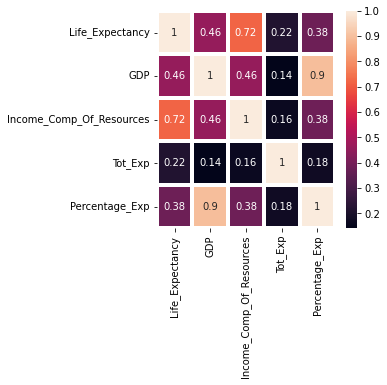

In [42]:
#Section 3.2 Economic Factors
who_tem = who[['Life_Expectancy','GDP', 'Income_Comp_Of_Resources', 'Tot_Exp', 'Percentage_Exp']]
plt.figure(figsize=(4,4))
sns.heatmap(who_tem.corr(), annot =True, linewidths = 3)



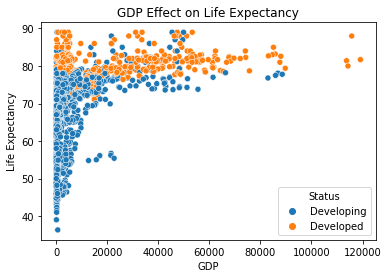

In [43]:
#Section 3.2 Economic Factors
#GDP
sns.scatterplot(x='GDP', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("GDP");
plt.title("GDP Effect on Life Expectancy");
plt.ylabel("Life Expectancy");

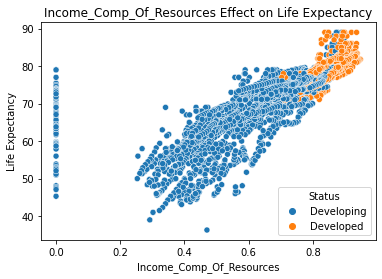

In [44]:
#Section 3.2 Economic Factors
#Income_Comp_Of_Resources
sns.scatterplot(x='Income_Comp_Of_Resources', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Income_Comp_Of_Resources");
plt.title("Income_Comp_Of_Resources Effect on Life Expectancy");
plt.ylabel("Life Expectancy");

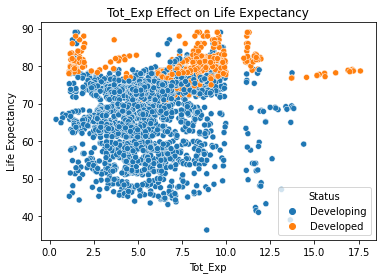

In [45]:
#Section 3.2 Economic Factors
#Tot_Exp
sns.scatterplot(x='Tot_Exp', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Tot_Exp");
plt.title("Tot_Exp Effect on Life Expectancy");
plt.ylabel("Life Expectancy");

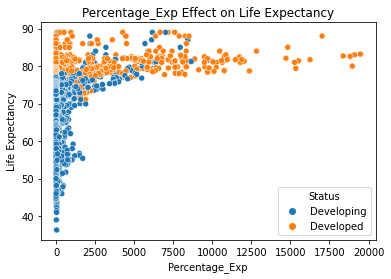

In [46]:
#Section 3.2 Economic Factors
#Percentage_Exp
sns.scatterplot(x='Percentage_Exp', y='Life_Expectancy', hue='Status', data=who)
plt.xlabel("Percentage_Exp");
plt.title("Percentage_Exp Effect on Life Expectancy");
plt.ylabel("Life Expectancy");

In [47]:
#3.1 Mortality Factors - Analysis  
print(who.columns.to_list())
who.dropna(subset = ['Adult_Mortality'], inplace = True)
Mortality_Factors = who[['Year','Country','Life_Expectancy', 'Status','Adult_Mortality', 'Infant_Deaths', 'Under_Five_Deaths','HIV/AIDS']]
#Mortality_Factors.info()

['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_10to19_years', 'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling']


In [48]:
#3.1 Mortality Factors - Overall Description of Data  
Mortality_Factors.describe()

#Description of each factor 
#Infant Deaths is an estimate that represents # of deaths between birth and age 1 based on the Infant Mortality Rate (probability of dying from 0-1 per 1000 live births)
#Adult Mortality Rate of both sexes represents probability of adult deaths between 15 and 60 years/1000 population. 
#Under 5 Deaths deaths is an estimate that represents # of deaths by age 5 based on the Under-five mortality rate (probability of dying by age 5 per 1000 live births)
#HIV/AIDS represents deaths/1,000 live births HIV/AIDS (0-4 years)

Year  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
count  2896.000000      2896.000000      2896.000000    2896.000000   
mean   2007.500000        69.350622       163.376381      30.233080   
std       4.610568         9.487962       123.887009     118.737448   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2003.750000        63.475000        73.000000       0.000000   
50%    2007.500000        72.200000       142.500000       3.000000   
75%    2011.250000        75.700000       225.000000      21.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

       Under_Five_Deaths     HIV/AIDS  
count        2896.000000  2896.000000  
mean           41.872583     1.745235  
std           161.534066     5.110210  
min             0.000000     0.100000  
25%             0.000000     0.100000  
50%             4.000000     0.100000  
75%            26.000000     0.800000  
max          2500.000000    50.600000

In [49]:
#3.1 Mortality Factors - Average Life Expectancy, Adult Mortality, Infant Deaths, and Under 5 deaths 

#Status = Developed 
Mortality1= Mortality_Factors.loc[Mortality_Factors['Status'] == 'Developed']
Mortality1.groupby(['Year'])[['Life_Expectancy','Adult_Mortality','Infant_Deaths','Under_Five_Deaths', 'HIV/AIDS']].mean()

Life_Expectancy  Adult_Mortality  Infant_Deaths  Under_Five_Deaths  \
Year                                                                       
2000        76.803125         91.71875        1.78125            2.15625   
2001        77.128125         90.28125        1.75000            2.09375   
2002        77.546875         86.46875        1.71875            2.06250   
2003        77.940625         81.93750        1.65625            2.00000   
2004        78.384375         84.46875        1.65625            1.93750   
2005        78.590625         89.59375        1.59375            1.93750   
2006        79.131250         93.53125        1.59375            1.90625   
2007        79.300000         75.90625        1.56250            1.84375   
2008        78.931250         77.06250        1.50000            1.78125   
2009        79.584375         76.75000        1.43750            1.78125   
2010        80.146875         74.53125        1.34375            1.68750   
2011        80.706250         65.68750        1.34375            1.65625   
2012        80.443750         71.09375        1.28125            1.59375   
2013        80.681250         66.65625        1.25000            1.56250   
2014        81.137500         74.40625        1.25000            1.50000   
2015        80.709375         74.87500        1.18750            1.46875   

      HIV/AIDS  
Year            
2000       0.1  
2001       0.1  
2002       0.1  
2003       0.1  
2004       0.1  
2005       0.1  
2006       0.1  
2007       0.1  
2008       0.1  
2009       0.1  
2010       0.1  
2011       0.1  
2012       0.1  
2013       0.1  
2014       0.1  
2015       0.1

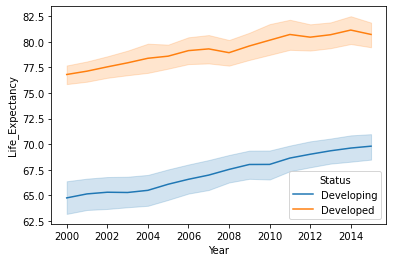

In [51]:
#3.1 Mortality Factors - Plot for Developed v.s. Developing Countries 
import seaborn as sns

Developed_Mortality_Rates = sns.lineplot(data=Mortality_Factors, x ="Year", y = "Life_Expectancy", hue ='Status')
Developed_Mortality_Rates 

Text(0, 0.5, 'Range')

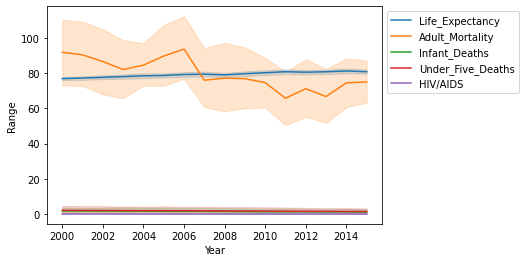

In [54]:
#3.1 Mortality Factors - Plotting all data for Status = Developed Countries to see any initial patterns of Average Numbers

#Average Life Expectancy by Year 
Developed_Mortality_Rates = sns.lineplot(data=Mortality1, x ="Year", y = "Life_Expectancy")
Developed_Mortality_Rates

#Adding to plot Adult Mortality Rates
Developed_Mortality_Rates1 = sns.lineplot(data=Mortality1, x ="Year", y = "Adult_Mortality")
Developed_Mortality_Rates1

#Adding to plot Infant Mortality Rates
Developed_Mortality_Rates2 = sns.lineplot(data=Mortality1, x ="Year", y = "Infant_Deaths")
Developed_Mortality_Rates2

#Adding to plot Rate of Under 5 Deaths
Developed_Mortality_Rates3 = sns.lineplot(data=Mortality1, x ="Year", y = "Under_Five_Deaths")
Developed_Mortality_Rates3
Developed_Mortality_Rates3

#Adding to plot Rate of Under 5 Deaths
Developed_Mortality_Rates3 = sns.lineplot(data=Mortality1, x ="Year", y = "HIV/AIDS")
plt.legend(labels=["Life_Expectancy","Adult_Mortality", "Infant_Deaths", "Under_Five_Deaths", "HIV/AIDS"],loc = 2, bbox_to_anchor = (1,1))
Developed_Mortality_Rates3
plt.ylabel("Range")

#As the below graph shows, countries with a Status of Developed from 2000-2015 have had a steady average Life Expectancy 
#around 80 years old, while from 2000-2015 Adult Mortality (probability of death between the age of 15-60) has decreased. 
#This decrease in probability of deaths between those years correlates with the average life expectancy of 80 years, as if 
#the probalility of dying before 60 is going down, life expectancy would therefore be expected to stay above 60. 

#For countries with a status of Developed, both Under 5 Deaths and Infant Deaths are steadily low, with averages
#from 2000-2015 below 2.5 for both categories. The amount of HIV/AIDS deaths is also an average of .1 for the entire data pull date. 

In [56]:
#3.1 Mortality Factors - Status = Developing
Mortality2 =Mortality_Factors.loc[Mortality_Factors['Status'] == 'Developing']
Mortality2.groupby(['Year'])[['Life_Expectancy','Adult_Mortality','Infant_Deaths','Under_Five_Deaths', 
                             'HIV/AIDS']].mean()

Life_Expectancy  Adult_Mortality  Infant_Deaths  Under_Five_Deaths  \
Year                                                                       
2000        64.765772       201.026846      45.040268          64.456376   
2001        65.154362       191.295302      44.174497          62.409396   
2002        65.318121       187.563758      42.664430          60.302013   
2003        65.292617       185.691275      41.818792          58.234899   
2004        65.502685       206.187919      40.315436          56.436242   
2005        66.097315       182.322148      38.778523          54.255034   
2006        66.580537       186.456376      38.093960          53.013423   
2007        66.989933       175.711409      36.644295          51.147651   
2008        67.544295       193.577181      35.382550          49.449664   
2009        68.024832       180.053691      34.651007          47.550336   
2010        68.031544       178.751678      33.416107          46.087248   
2011        68.651007       174.147651      32.073826          44.100671   
2012        69.022819       163.570470      31.489933          42.469799   
2013        69.359060       164.523490      30.201342          40.798658   
2014        69.626846       162.798658      29.322148          39.234899   
2015        69.810738       167.926174      28.416107          37.677852   

      HIV/AIDS  
Year            
2000  3.067114  
2001  3.118121  
2002  3.116107  
2003  3.081879  
2004  2.995973  
2005  2.832215  
2006  2.614094  
2007  2.395973  
2008  2.155705  
2009  1.838255  
2010  1.514094  
2011  1.292617  
2012  1.089262  
2013  0.910067  
2014  0.790604  
2015  0.765101

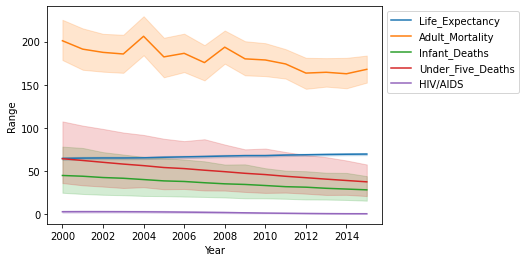

In [57]:
#3.1 Mortality Factors - Plots for Status = Developing Countries to see any initial patterns of Average Numbers

#Average Life Expectancy by Year 
import seaborn as sms
Developing_Mortality_Rates = sns.lineplot(data=Mortality2, x ="Year", y = "Life_Expectancy")
Developing_Mortality_Rates 

#Adding to plot Adult Mortality Rates
Developing_Mortality_Rates1 = sns.lineplot(data=Mortality2, x ="Year", y = "Adult_Mortality")
Developing_Mortality_Rates1

#Adding to plot Infant Mortality Rates
Developing_Mortality_Rates2 = sns.lineplot(data=Mortality2, x ="Year", y = "Infant_Deaths")
Developing_Mortality_Rates2

#Adding to plot Rate of Under 5 Deaths
Developing_Mortality_Rates3 = sns.lineplot(data=Mortality2, x ="Year", y = "Under_Five_Deaths")
plt.legend(labels=["Life_Expectancy","Adult_Mortality_Rate", "Infant_Mortality_Rate", "Under_Five_Deaths"],loc = 2, bbox_to_anchor = (1,1))
Developing_Mortality_Rates3

#Adding to plot Rate of Under 5 Deaths
Developing_Mortality_Rates3 = sns.lineplot(data=Mortality2, x ="Year", y = "HIV/AIDS")
plt.legend(labels=["Life_Expectancy","Adult_Mortality", "Infant_Deaths", "Under_Five_Deaths", "HIV/AIDS"],loc = 2, bbox_to_anchor = (1,1))
plt.ylabel("Range")
Developing_Mortality_Rates3

#With the below graph, you can see that for countries with the status of Developing, average number of Infant Deaths & Under 5 Deaths are much higher. 
#The average life expectancy is between 64-70, while the average number of Infant Deaths is from 45-28. 
#This higher rate of Infant Mortality deaths could be correlated to a lower
#life expectancy for countries. This could also be said for the average number of deaths for Under 5, as 
#the average number of deaths for under 5 was from 65 to 38. The average number of HIV/AIDS deaths is also much higher for this group, 
#although at decreasing rate.

Text(0, 0.5, 'Life Expectancy')

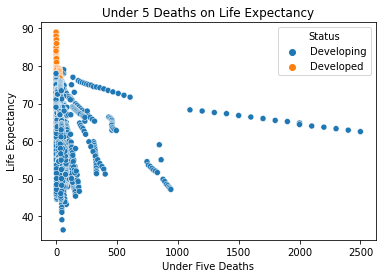

In [58]:
#3.1 Mortality Factors - Plotting Under 5 Deaths againt Life Expectancy 

#To find correlation, plotting Under 5 Deaths against Life Expectancy

sms.scatterplot(x=Mortality_Factors['Under_Five_Deaths'], y = Mortality_Factors['Life_Expectancy'], hue = 'Status', data = Mortality_Factors)
plt.xlabel("Under Five Deaths");
plt.title("Under 5 Deaths on Life Expectancy");
plt.ylabel("Life Expectancy")

#From this scatterplot you can see as the number of Under 5 Deaths against Life Expectancy occurs at a linear negative relationship. 
#From the initial graph we concluded that Developed countries had a higher Life Expectancy and that the average number  
#of Under 5 Deaths was between 2.2 and 1.5. For developing countries, the number of under 5 year old death was higher, on average between 
#65-38. The below graph shows a definite negative linear correlation between under 5 year old deaths and life expectancy, 
#particularly showcasing the higher and more varying rates of Under 5 Deaths among Developing countries. 

Text(0, 0.5, 'Life Expectancy')

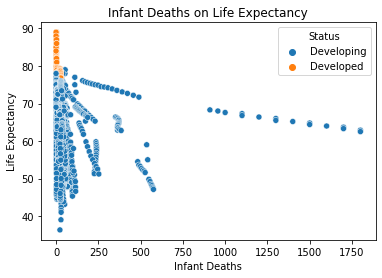

In [59]:
#3.1 Mortality Factors - Plotting Infant Mortality Rates againt Life Expectancy 

#To find correlation, plotting Infant Mortality Rate against Life Expectancy

sms.scatterplot(x=Mortality_Factors['Infant_Deaths'], y = Mortality_Factors['Life_Expectancy'], hue = 'Status', data = Mortality_Factors)
plt.xlabel("Infant Deaths");
plt.title("Infant Deaths on Life Expectancy");
plt.ylabel("Life Expectancy")

#Similar to the above graph, you can see a clear correlation and negative linear relationship between Life Expectancy and increasing Infant 
#death amount. It is also worthy to note that developing countries have both a higher and more varying amount of 
#the number of infant deaths. Developed countries have less variation within their data for infant deaths. 

Text(0, 0.5, 'Life Expectancy')

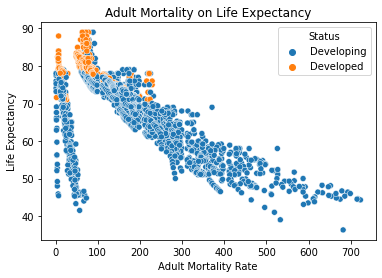

In [60]:
#3.1 Mortality Factors - Plotting Adult Mortality againt Life Expectancy 

#To find correlation, plotting Adult Mortality Rate against Life Expectancy 

sms.scatterplot(x=Mortality_Factors['Adult_Mortality'], y = Mortality_Factors['Life_Expectancy'], hue = 'Status', data = Mortality_Factors)
plt.xlabel("Adult Mortality Rate");
plt.title("Adult Mortality on Life Expectancy");
plt.ylabel("Life Expectancy")

#Again from the below graph, you can see a clear correlation and negative linear relationship between a higher probaility of Adult Mortality 
#and Life Expectancy. This suggests that countries with a higher adult mortality probability have a lower life expectancy. As
#noted in the prior graph for Developed countries, Adult Mortality calculates the probability of death between 
#the ages of 15-60 and since Developed countries had a higher Life Expectancy during this data pull, it makes sense 
#Developed have lower values of Adult Mortality. 

Text(0, 0.5, 'Life Expectancy')

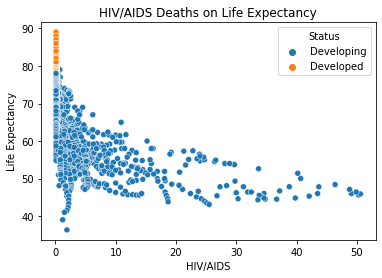

In [61]:
#3.1 Mortality Factors - Plotting HIV/AIDS deaths amoung (0-4 years) againt Life Expectancy 

#To find correlation, plotting HIV/AIDS Rate against Life Expectancy

sms.scatterplot(x=Mortality_Factors['HIV/AIDS'], y = Mortality_Factors['Life_Expectancy'], hue = 'Status', data = Mortality_Factors)
plt.xlabel("HIV/AIDS");
plt.title("HIV/AIDS Deaths on Life Expectancy");
plt.ylabel("Life Expectancy")

#The below shows a distinct correlation and negative linear relationship. As the number of HIV/AIDS deaths among 0-4 years increases,
#life expectancy goes down. 

In [62]:
#3.1 Mortality Factors - Analysis: 
  
#Based on the above (Avg. Calculations & Visualizations), 
#there is a distinct negative linear correlation between mortality deaths, including HIV/AIDS (0-4 years), infant deaths, 
#deaths under 5 years and high probability of adult mortality, and life expectancy. One thing to note that is also correlated, 
#is that Developing countries have more distributed rates of  mortality issues (visually more blue points in the above visualizations), 
#whereas Developed countries have less deviations within the data meaning not only are there small number of deaths, 
#but the value of deaths for Developed countries is very close to the mean. 

#Based on the above, a higher average life expectancy for a country can be correlated with low rates of HIV/AIDS deaths among 0-4 years,
#low number of infant deaths, low amount of deaths under the age of 5, and a low probability of adult mortality. 
